In [39]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import os
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import datetime

file_grey = 'greyDate.csv' 
file_old = 'greyDate_old.csv'
output_remain = 'grey_remain.csv'
output_penetration = 'grey_penetration.csv'
output_active_level = 'grey_active_level.csv'

grey = pd.read_csv(file_grey)
dates = grey['update_date']
old = pd.read_csv(file_old)
dates_old = old['update_date']

# 输入一灰日期or对应不看的灰度数据
delete_date = ['2018-09-06']

dir_path = []
file_path = []
for i in dates:
    path = os.getcwd()
    if i not in delete_date:    
        if i not in file_path:
            file_path.append(i)
            dir_name = i
            os.mkdir(dir_name)

            grey_f = grey[grey['update_date'].str.contains(i)]
            grey_f.to_csv(path+'/'+i +'/'+i + '_grey' +'.csv')

            old_f = old[old['update_date'].str.contains(i)]
            old_f.to_csv(path+'/'+i +'/'+i + '_old' + '.csv')
        tmp = path+'/'+i
        if tmp not in dir_path:
            dir_path.append(tmp)
print("数据切割成功")        

FileNotFoundError: [Errno 2] No such file or directory: '2018/9/24'

In [40]:
import shutil
def remove_folder(path):
    if os.path.exists(path):
         shutil.rmtree(path)
for pth in dates:
    remove_folder(pth)
print("删除所有按进组日期拆分的文件夹/请运行完程序后使用")    

TypeError: argument should be string, bytes or integer, not float

# 1·全局灰度数据

### 留存率

day,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7
灰度用户,0.876254,0.886907,0.902121,0.913283,0.912251,0.903724,0.914497,0.923276,0.908887,0.902204,0.901807,0.887312,0.883536,0.877209
大盘用户,0.710703,0.719764,0.733095,0.745229,0.742206,0.743038,0.764179,0.771026,0.762078,0.758781,0.741895,0.722490,0.716292,0.711267


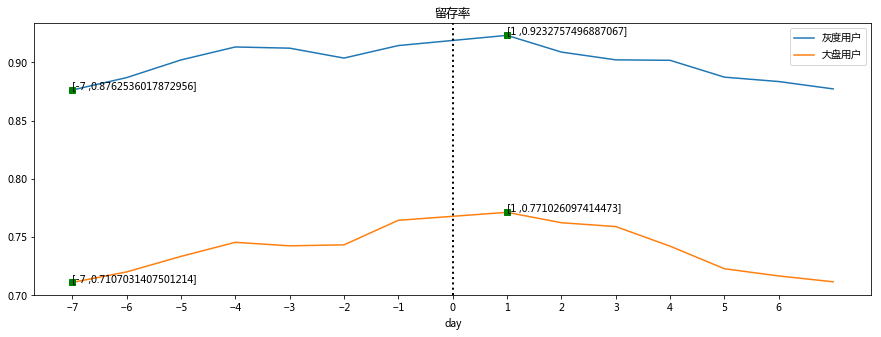

In [29]:
def get_remain_rate(file):
    df_ori = pd.read_csv(file)
    df_selected = df_ori[['update_date','day','user_count']]
    table = pd.pivot_table(df_selected, values = ['user_count'], index=['day'], columns = ['update_date'], aggfunc=np.sum)
    df_remain_rate = pd.DataFrame(index = table.index)
    row_day0 = table.loc[[0]]
    for i in table.index:
        row = table.loc[[i]]
        row = row[row.columns[~row.isnull().all()]]
        day0 = row_day0[row.columns]
        remain_rate = sum(row.values[0])/sum(day0.values[0])
        df_remain_rate.loc[i,0] = remain_rate
    return df_remain_rate.drop([0])
def demo_test(a):
    min_index = a.idxmin()
    max_index = a.idxmax()
    plt.plot(min_index,a[min_index],'gs')
    plt.plot(max_index,a[max_index],'gs')

    show_max = '['+str(max_index)+' ,'+str(a[max_index])+']'
    plt.annotate(show_max,xytext=(max_index,a[max_index]),xy=(max_index,a[max_index].round(2)))
    show_min = '['+str(min_index)+' ,'+str(a[min_index])+']'
    plt.annotate(show_min,xytext=(min_index,a[min_index]),xy=(min_index,a[min_index].round(2)))

remain_grey = get_remain_rate(file_grey)
remain_old = get_remain_rate(file_old)
remain_difference = pd.concat([remain_grey, remain_old], axis=1)


remain_difference.columns = ['灰度用户','大盘用户']
remain_difference.to_csv(output_remain, encoding = 'utf_8_sig')
remain_difference.plot(figsize=(15,5),title='留存率')
my_x_ticks = np.arange(-7, 7, 1)
plt.xticks(my_x_ticks)
for idx in ['灰度用户','大盘用户']:
    demo_test(remain_difference[idx])
l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')

remain_difference.T

### 渗透率

day,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7
人均时长,0.381009,0.403459,0.309761,0.319889,0.442936,0.458586,0.480949,0.496003,0.362878,0.316109,0.414576,0.400522,0.409512,0.387676
人均启动数,0.570269,0.649736,0.576037,0.551016,0.633610,0.678878,0.715248,0.703414,0.597071,0.543580,0.613405,0.650182,0.623047,0.588546
播放渗透率,0.034441,0.034593,0.033520,0.032926,0.035514,0.037929,0.039103,0.040409,0.036360,0.034468,0.035826,0.036811,0.036308,0.035907
推荐页播放渗透率,0.037553,0.038105,0.036625,0.035883,0.039165,0.041740,0.042921,0.044368,0.040234,0.037350,0.039113,0.040189,0.040016,0.039036
播放完成渗透率,0.051290,0.052045,0.050333,0.049734,0.054508,0.057632,0.059203,0.062451,0.055136,0.052205,0.054963,0.055438,0.054565,0.053920
点赞渗透率,0.217744,0.233706,0.209510,0.211471,0.247936,0.261553,0.269327,0.269852,0.230668,0.213099,0.242330,0.238431,0.232766,0.231687
评论渗透率,0.729787,0.844185,0.761527,0.736749,0.794992,0.892148,0.904320,0.864221,0.776914,0.701294,0.764844,0.771476,0.749380,0.795646
分享渗透率,0.497201,0.552764,0.515355,0.537609,0.523388,0.610948,0.613263,0.623107,0.500546,0.454628,0.500480,0.459809,0.480036,0.481472
投稿渗透率,1.411154,1.432191,1.316689,1.301131,1.462377,1.598676,1.743669,1.576189,1.309024,1.204741,1.421623,1.321013,1.275312,1.293823
推荐页点击头像渗透率,0.421147,0.471425,0.408447,0.424012,0.448676,0.451921,0.450171,0.576629,0.492798,-0.348344,0.287662,0.449307,0.397773,0.388981


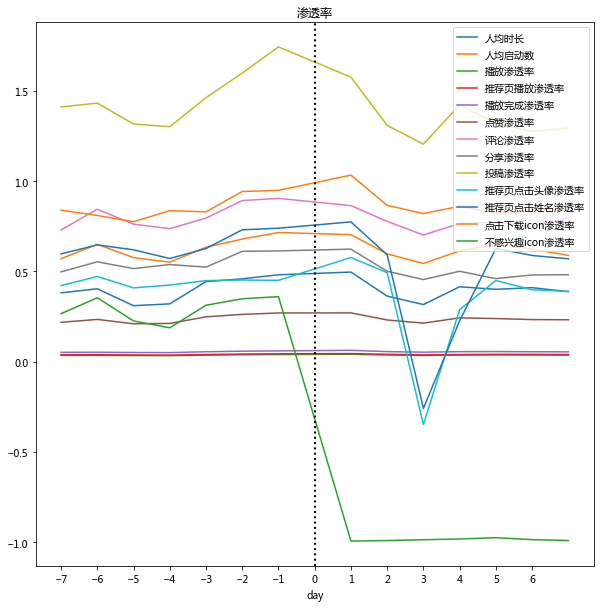

In [4]:
# 渗透率
def get_key_index_penetration(file):
    df_ori = pd.read_csv(file)
    selected_columns = df_ori.columns.drop('update_date').drop('dlu_date')

    aggregated_columns = selected_columns.drop('day')

    table = pd.pivot_table(df_ori[selected_columns], values = aggregated_columns, index=['day'], aggfunc=np.sum)

    df_key_index = pd.DataFrame(index = table.index)
    for column_name in ['session_duration',
                        'session_count',
                        'video_play_uv',
                        'video_play_homepage_hot_uv',
                        'video_play_finish_uv',
                        'like_video_uv',
                        'comment_video_uv',
                        'share_video_uv',
                        'publish_start_uv',
                        'head_homepage_hot_uv',
                        'name_homepage_hot_uv',
                        'download_uv',
                        'dislike_uv'
                        ]:
        df = table[column_name] / table['user_count']
        df_key_index = pd.concat([df_key_index, df], axis=1)
    df_key_index.columns = ['人均时长',
                            '人均启动数',
                            '播放渗透率',
                            '推荐页播放渗透率',
                            '播放完成渗透率',
                            '点赞渗透率',
                            '评论渗透率',
                            '分享渗透率',
                            '投稿渗透率',
                            '推荐页点击头像渗透率',
                            '推荐页点击姓名渗透率',
                            '点击下载icon渗透率',
                            '不感兴趣icon渗透率'
                            ]

    return df_key_index

def compare_relative_difference(index_grey, index_old):
    df_relative_difference = pd.DataFrame(index = index_grey.index)
    for column_name in index_grey.columns:
        df = (index_grey[column_name]-index_old[column_name])/index_old[column_name]
        df_relative_difference = pd.concat([df_relative_difference, df], axis=1)
    return df_relative_difference.drop([0])



index_grey_penetration = get_key_index_penetration(file_grey)
index_old_penetration = get_key_index_penetration(file_old)
relative_difference_penetration = compare_relative_difference(index_grey_penetration, index_old_penetration)
relative_difference_penetration.to_csv(output_penetration,encoding = 'utf_8_sig')

relative_difference_penetration.plot(figsize=(10,10),title='渗透率')
plt.legend(loc='upper right')
my_x_ticks = np.arange(-7, 7, 1)
plt.xticks(my_x_ticks)
l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
relative_difference_penetration.T

### 人均指标

day,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7
视频播放pv/uv,0.387119,0.428090,0.335305,0.335335,0.448649,0.464966,0.510271,0.482410,0.343857,0.287421,0.440194,0.408437,0.401214,0.377296
推荐页视频播放pv/uv,0.330506,0.373611,0.287943,0.286247,0.390285,0.399007,0.448451,0.416028,0.288420,0.228495,0.392538,0.353120,0.337443,0.311958
点赞pv/uv,0.437834,0.385720,0.272419,0.280432,0.395699,0.475062,0.470157,0.439623,0.304603,0.286240,0.397929,0.449171,0.426455,0.451003
评论pv/uv,0.418373,0.396030,0.329237,0.326666,0.338977,0.413987,0.393649,0.356317,0.330390,0.255697,0.295003,0.313212,0.337090,0.339755
分享pv/uv,0.142376,0.136368,0.163594,0.152798,0.176223,0.195979,0.150010,0.170642,0.205077,0.167264,0.174494,0.185986,0.120255,0.164184
投稿pv/uv,0.231349,0.223178,0.152714,0.142924,0.172781,0.197454,0.209735,0.253586,0.228022,0.198927,0.228605,0.227887,0.210754,0.192335
推荐页点击头像pv/uv,0.299074,0.370507,0.253298,0.277432,0.345102,0.378031,0.376186,0.314017,0.269309,0.509310,0.027391,0.259923,0.332331,0.301793
推荐页点击名字pv/uv,0.398571,0.450207,0.440445,0.333650,0.380755,0.447695,0.467911,0.403343,0.388108,0.649316,0.215203,0.288653,0.338526,0.323589
播放时长sum/uv,0.361890,0.405149,0.317572,0.313996,0.421945,0.434488,0.481118,0.450391,0.316946,0.259681,0.420443,0.383173,0.370950,0.347557
推荐页播放时长sum/uv,0.331456,0.374784,0.285685,0.284246,0.390524,0.401231,0.448380,0.416831,0.287212,0.229455,0.389241,0.353192,0.339320,0.314690


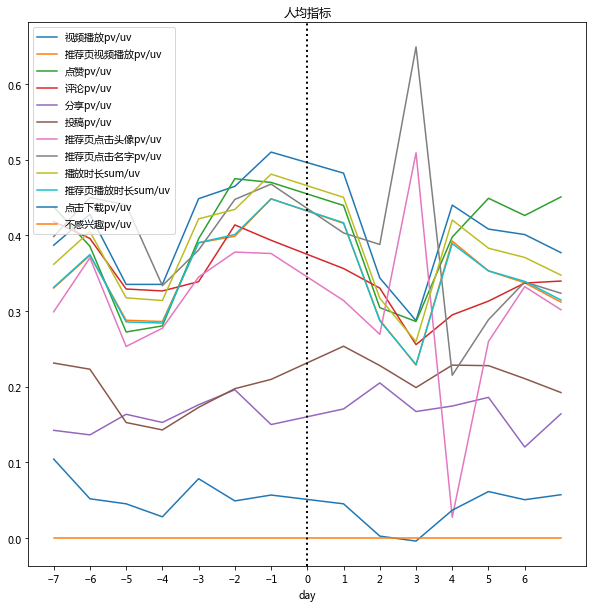

In [5]:
# 人均指标
def get_key_index_active_level(file):
    df_ori = pd.read_csv(file)
    selected_columns = df_ori.columns.drop('update_date').drop('dlu_date')
    aggregated_columns = selected_columns.drop('day')
    table = pd.pivot_table(df_ori[selected_columns], values = aggregated_columns, index=['day'], aggfunc=np.sum)

    df_key_index = pd.DataFrame(index = table.index)
    for column_name, column_name_uv in zip(
            ['video_play',
             'video_play_homepage_hot',
             'like_video',
             'comment_video',
             'share_video',
             'publish_start',
             'head_homepage_hot',
             'name_homepage_hot',
             'play_time',
             'play_time_homepage_hot',
             'download',
             'dislike_uv'
             ],
            ['video_play_uv',
             'video_play_homepage_hot_uv',
             'like_video_uv',
             'comment_video_uv',
             'share_video_uv',
             'publish_start_uv',
             'head_homepage_hot_uv',
             'name_homepage_hot_uv',
             'play_time_uv',
             'play_time_homepage_hot_uv',
             'download_uv',
             'dislike_uv'
             ]):
    
        df = table[column_name] / table[column_name_uv]
        df_key_index = pd.concat([df_key_index, df], axis=1)
    df_key_index.columns = ['视频播放pv/uv',
                            '推荐页视频播放pv/uv',
                            '点赞pv/uv',
                            '评论pv/uv',
                            '分享pv/uv',
                            '投稿pv/uv',
                            '推荐页点击头像pv/uv',
                            '推荐页点击名字pv/uv',
                            '播放时长sum/uv',
                            '推荐页播放时长sum/uv','点击下载pv/uv','不感兴趣pv/uv'
                            ]

    return df_key_index.drop([0])

def compare_relative_difference(index_grey, index_old):
    df_relative_difference = pd.DataFrame(index = index_grey.index)
    for column_name in index_grey.columns:
        df = (index_grey[column_name]-index_old[column_name])/index_old[column_name]
        df_relative_difference = pd.concat([df_relative_difference, df], axis=1)
    return df_relative_difference


index_grey_active_level = get_key_index_active_level(file_grey)
index_old_active_level = get_key_index_active_level(file_old)

relative_difference_active_level = compare_relative_difference(index_grey_active_level, index_old_active_level)
relative_difference_active_level.to_csv(output_active_level,encoding = 'utf_8_sig')
relative_difference_active_level.plot(figsize=(10,10),title='人均指标')
plt.legend(loc='upper left')
my_x_ticks = np.arange(-7, 7, 1)
plt.xticks(my_x_ticks)
l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
relative_difference_active_level.T

# 2·按进组日期拆分灰度用户

### 多日留存率

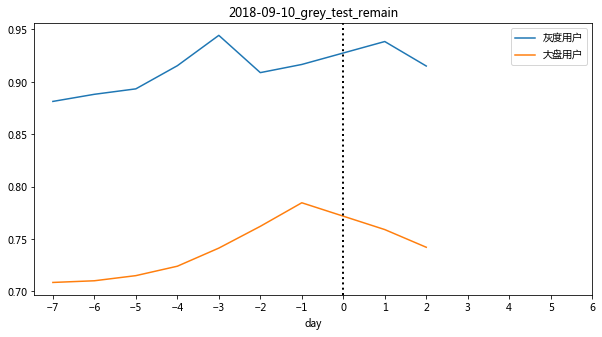

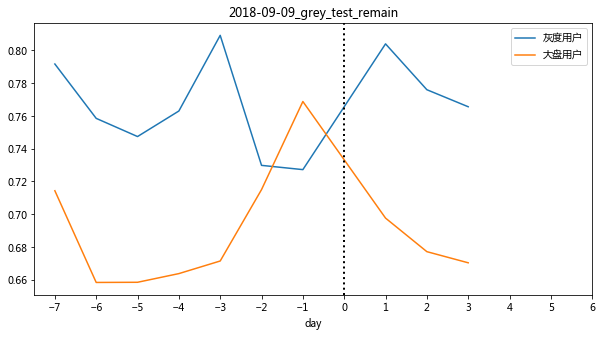

In [34]:
output_remain_single = 'grey_remain_single.csv'
# 留存率
def get_remain_rate(file):
    df_ori = pd.read_csv(file)
    df_selected = df_ori[['update_date','day','user_count']]
    table = pd.pivot_table(df_selected, values = ['user_count'], index=['day'], columns = ['update_date'], aggfunc=np.sum)
    df_remain_rate = pd.DataFrame(index = table.index)
    row_day0 = table.loc[[0]]
    for i in table.index:
        row = table.loc[[i]]
        row = row[row.columns[~row.isnull().all()]]
        day0 = row_day0[row.columns]
        a = sum(row.values[0])
        b = sum(day0.values[0])
        remain_rate = format(float(a)/float(b),'.4f')
        remain_rate=float(remain_rate)
        df_remain_rate.loc[i,0] = remain_rate
    return df_remain_rate.drop([0])

remain_difference_days = []
for index in dir_path:
        pth = index.split('/')
        file_grey = index +'/'+ pth[-1] +'_grey' + '.csv'
        file_old =  index +'/'+ pth[-1] + '_old' + '.csv'
        output_remain = index +'/'+ pth[-1] +'_grey_test_remain.csv'

        remain_grey = get_remain_rate(file_grey)
        remain_old = get_remain_rate(file_old)
        remain_difference = pd.concat([remain_grey, remain_old], axis=1)
        remain_difference.columns = ['灰度用户', '大盘用户']
        remain_difference_days.append(remain_difference)
        remain_difference.to_csv(output_remain, encoding='utf_8_sig')        
        remain_difference.to_csv(output_remain_single, mode='a', header=True, encoding='utf_8_sig')
        remain_difference.plot(figsize=(10,5),title=pth[-1]+'_grey_test_remain')
        my_x_ticks = np.arange(-7, 7, 1)
        plt.xticks(my_x_ticks)
        plt.legend(loc='upper right')
        l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
        
# for n in range(len(remain_difference_days)):
#     single_day = pd.DataFrame(remain_difference_days[n])
#     single_day.to_csv(output_remain_single, mode='a', header=True, encoding='utf_8_sig')
    

### 多日渗透率

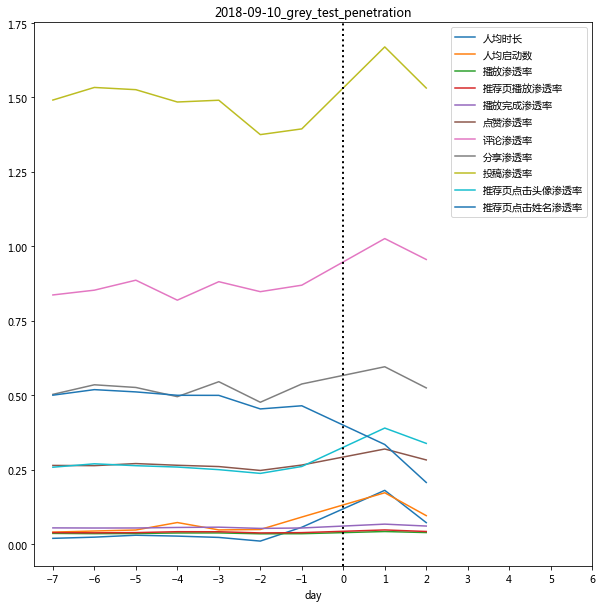

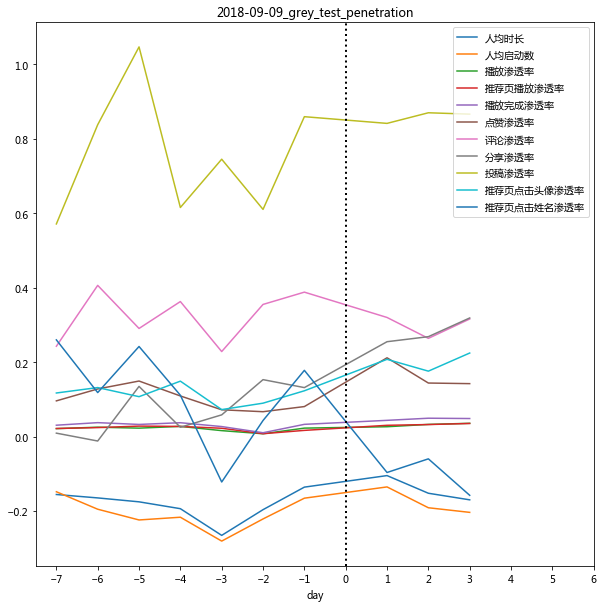

In [35]:
# 渗透率
output_penetration_single = 'grey_penetration_single.csv'

def penetration(file):
    df_ori = pd.read_csv(file)
    selected_columns = df_ori.columns.drop('dlu_date')
    aggregated_columns = selected_columns.drop('day')
    table = pd.pivot_table(df_ori[selected_columns], values=aggregated_columns, index=['day'], aggfunc=np.sum)
    df_key_index = pd.DataFrame(index=table.index)
    for column_name in ['session_duration',
                        'session_count',
                        'video_play_uv',
                        'video_play_homepage_hot_uv',
                        'video_play_finish_uv',
                        'like_video_uv',
                        'comment_video_uv',
                        'share_video_uv',
                        'publish_start_uv',
                        'head_homepage_hot_uv',
                        'name_homepage_hot_uv',
                        ]:
        df = table[column_name] / table['user_count']
        df_key_index = pd.concat([df_key_index, df], axis=1)
    df_key_index.columns = ['人均时长',
                            '人均启动数',
                            '播放渗透率',
                            '推荐页播放渗透率',
                            '播放完成渗透率',
                            '点赞渗透率',
                            '评论渗透率',
                            '分享渗透率',
                            '投稿渗透率',
                            '推荐页点击头像渗透率',
                            '推荐页点击姓名渗透率'
                            ]
    return df_key_index
def compare_relative_difference(index_grey, index_old):
        df_relative_difference = pd.DataFrame(index=index_grey.index)
        for column_name in index_grey.columns:
            df = (index_grey[column_name] - index_old[column_name]) / index_old[column_name]
            df_relative_difference = pd.concat([df_relative_difference, df], axis=1)
        return df_relative_difference.drop([0])

penetration_difference_days = []
for index in dir_path:
        pth = index.split('/')
        file_grey = index +'/'+ pth[-1] +'_grey' + '.csv'
        file_old =  index +'/'+ pth[-1] + '_old' + '.csv'
        output_active_level = index +'/'+ pth[-1] +'_grey_test_active_level.csv'

        grey_penetration = penetration(file_grey)
        old_penetration = penetration(file_old)
        relative_difference_penetration = compare_relative_difference(grey_penetration, old_penetration)
        penetration_difference_days.append(relative_difference_penetration)

        relative_difference_penetration.to_csv(output_penetration, encoding='utf_8_sig')
        relative_difference_penetration.to_csv(output_penetration_single, mode='a', header=True, encoding='utf_8_sig')
        relative_difference_penetration.plot(figsize=(10,10),title=pth[-1]+ '_grey_test_penetration')
        plt.legend(loc='upper right')
        my_x_ticks = np.arange(-7, 7, 1)
        plt.xticks(my_x_ticks)
        l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
# #设置 day 可查看对应进组用户的数据
# day = 3        
# print(penetration_days[day])    
# for n in range(len(penetration_difference_days)):
#     single_day = pd.DataFrame(penetration_difference_days[n])
#     single_day.to_csv(output_penetration_single, mode='a', header=True, encoding='utf_8_sig')
    

### 多日人均指标

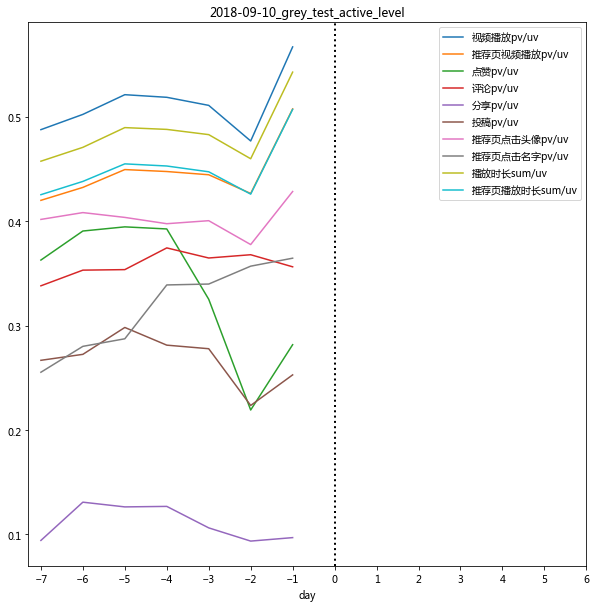

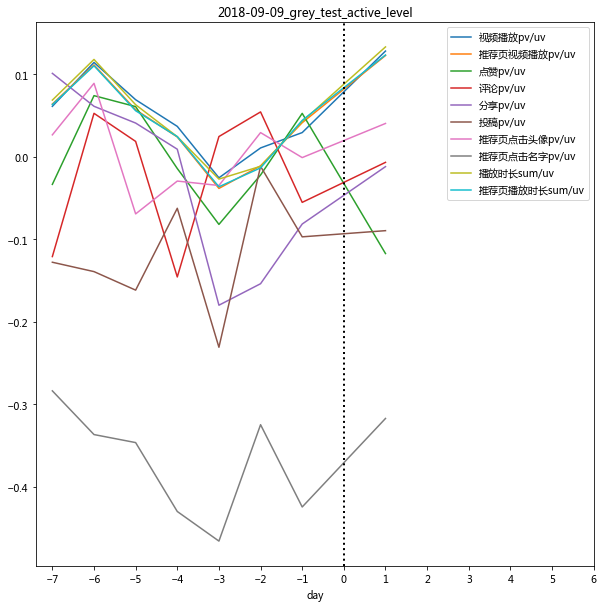

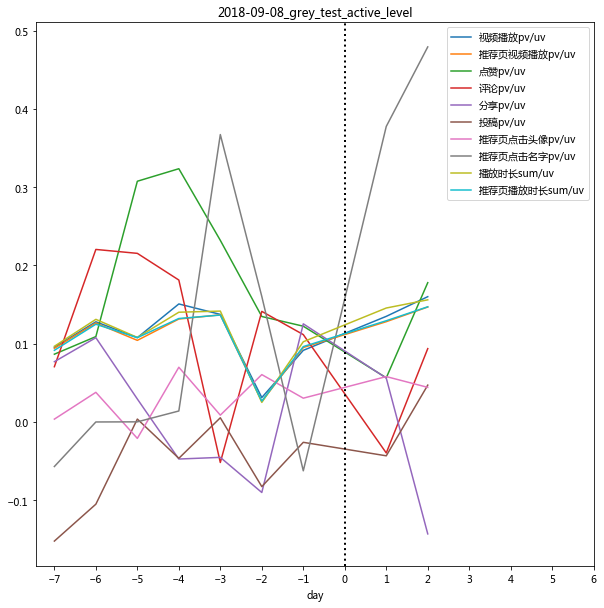

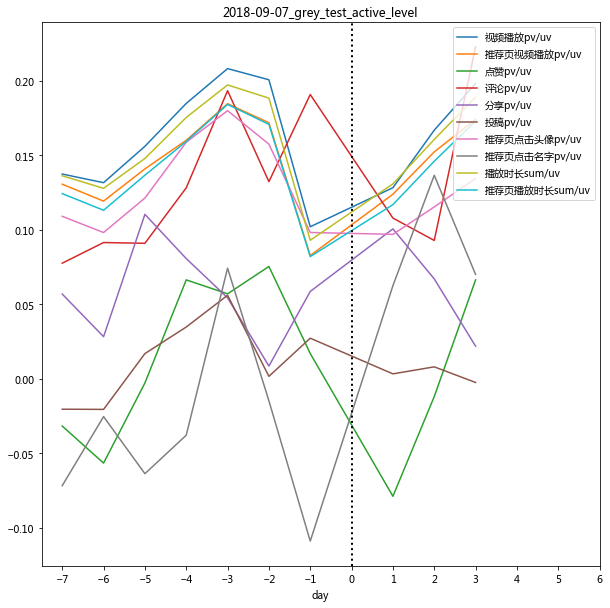

In [18]:
# 人均指标
output_active_level_single = 'grey_active_level_single.csv'

def get_key_index_active_level(file):
        df_ori_a = pd.read_csv(file)
        selected_columns_a = df_ori_a.columns.drop('update_date').drop('dlu_date')
        aggregated_columns_a = selected_columns_a.drop('day')
        table_a = pd.pivot_table(df_ori_a[selected_columns_a], values=aggregated_columns_a, index=['day'], aggfunc=np.sum)

        df_key_index_a = pd.DataFrame(index=table_a.index)
        for column_name, column_name_uv in zip(
                ['video_play',
                 'video_play_homepage_hot',
                 'like_video',
                 'comment_video',
                 'share_video',
                 'publish_start',
                 'head_homepage_hot',
                 'name_homepage_hot',
                 'play_time',
                 'play_time_homepage_hot'
                 ],
                ['video_play_uv',
                 'video_play_homepage_hot_uv',
                 'like_video_uv',
                 'comment_video_uv',
                 'share_video_uv',
                 'publish_start_uv',
                 'head_homepage_hot_uv',
                 'name_homepage_hot_uv',
                 'play_time_uv',
                 'play_time_homepage_hot_uv'
                 ]):
            df = table_a[column_name] / table_a[column_name_uv]
            df_key_index_a = pd.concat([df_key_index_a, df], axis=1)
        df_key_index_a.columns = ['视频播放pv/uv',
                                '推荐页视频播放pv/uv',
                                '点赞pv/uv',
                                '评论pv/uv',
                                '分享pv/uv',
                                '投稿pv/uv',
                                '推荐页点击头像pv/uv',
                                '推荐页点击名字pv/uv',
                                '播放时长sum/uv',
                                '推荐页播放时长sum/uv'
                                ]
        return df_key_index_a

def compare_relative_difference(index_grey, index_old):
        df_relative_difference = pd.DataFrame(index=index_grey.index)
        for column_name in index_grey.columns:
            df = (index_grey[column_name] - index_old[column_name]) / index_old[column_name]
            df_relative_difference = pd.concat([df_relative_difference, df], axis=1)
        return df_relative_difference.drop([0])
active_difference_days = []    
for index in dir_path:
        pth = index.split('/')
        file_grey = index +'/'+ pth[-1] +'_grey' + '.csv'
        file_old =  index +'/'+ pth[-1] + '_old' + '.csv'
        output_active_level = index +'/'+ pth[-1] +'_grey_test_active_level.csv'


        index_grey_active_level = get_key_index_active_level(file_grey)
        index_old_active_level = get_key_index_active_level(file_old)
        relative_difference_active_level = compare_relative_difference(index_grey_active_level, index_old_active_level)
        active_difference_days.append(relative_difference_active_level)
        relative_difference_active_level.to_csv(output_active_level, encoding='utf_8_sig')
        relative_difference_active_level.to_csv(output_active_level_single, mode='a', header=True, encoding='utf_8_sig')        
        relative_difference_active_level.plot(figsize=(10,10),title=pth[-1]+'_grey_test_active_level')
        plt.legend(loc='upper right')
        my_x_ticks = np.arange(-7, 7, 1)
        plt.xticks(my_x_ticks)
        l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
# for n in range(len(active_difference_days)):
#     single_day = pd.DataFrame(active_difference_days[n])
#     single_day.to_csv(output_active_level_single, mode='a', header=True, encoding='utf_8_sig')        

# 3·单指标多日

### 单指标多日-渗透率

In [12]:
# 输入需要查看的相关指标 e.g(index_value = 'publish_start_uv' index = '投稿渗透率')
index = ['服务端投稿渗透率']
index_uv = ['publish_uv']

day,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7
灰度用户,0.111796,0.117927,0.119889,0.125600,0.128295,0.126638,0.131753,0.137239,0.008642,0.00000,0.0,0.0,0.0,0.0,0.0
大盘用户,0.049977,0.052069,0.055393,0.058367,0.055868,0.052110,0.051204,0.043610,0.025832,0.00096,0.0,0.0,0.0,0.0,0.0


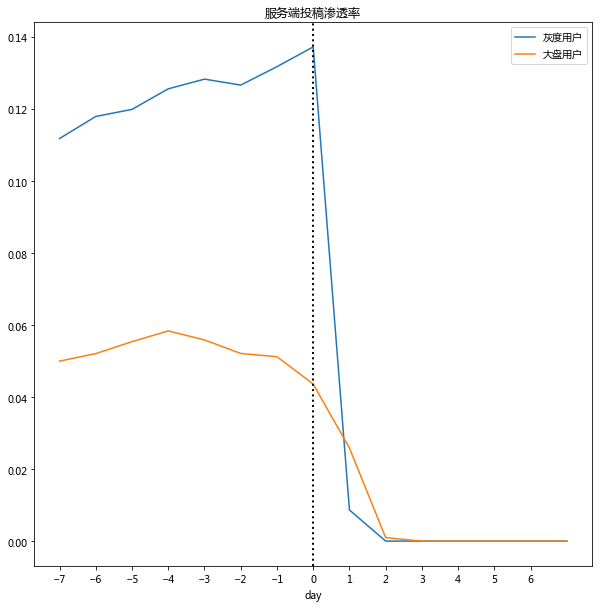

In [13]:
# 渗透率
# 输入需要查看的相关指标 e.g(index_value = 'publish_start_uv' index = '投稿渗透率')
output_single_pentration_level = 'single_pentration_grey_old.csv'

def penetration(file,vlue,name):
    df_ori = pd.read_csv(file)
    selected_columns = df_ori.columns.drop('dlu_date')
    aggregated_columns = selected_columns.drop('day')
    table = pd.pivot_table(df_ori[selected_columns], values=aggregated_columns, index=['day'], aggfunc=np.sum)
    df_key_index = pd.DataFrame(index=table.index)

    df = table[vlue] / table['user_count']
    df_key_index = pd.concat([df_key_index, df], axis=1)
    df_key_index.columns = [name]
    return df_key_index

for index_uv,index in zip(index_uv,index):
    single_grey_penetration_level = penetration(file_grey, index_uv,index)
    single_old_penetration_level = penetration(file_old, index_uv,index)
    single_days_penetration_level = pd.concat([single_grey_penetration_level, single_old_penetration_level], axis=1)
    single_days_penetration_level.to_csv(output_single_pentration_level, encoding='utf_8_sig')
    single_days_penetration_level.columns = ['灰度用户','大盘用户']

    single_days_penetration_level.plot(figsize=(10,10),title=index)
    plt.legend(loc='upper right')
    l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
    my_x_ticks = np.arange(-7, 7, 1)
    plt.xticks(my_x_ticks)
    plt.legend(loc='upper right')

single_days_penetration_level.T

### 单指标多日-人均指标

In [21]:
# 输入需要查看的指标/或是增加的指标
index = ['推荐页点击姓名pv/uv']
index_uv = ['name_homepage_hot_uv']
index_pv = ['name_homepage_hot']

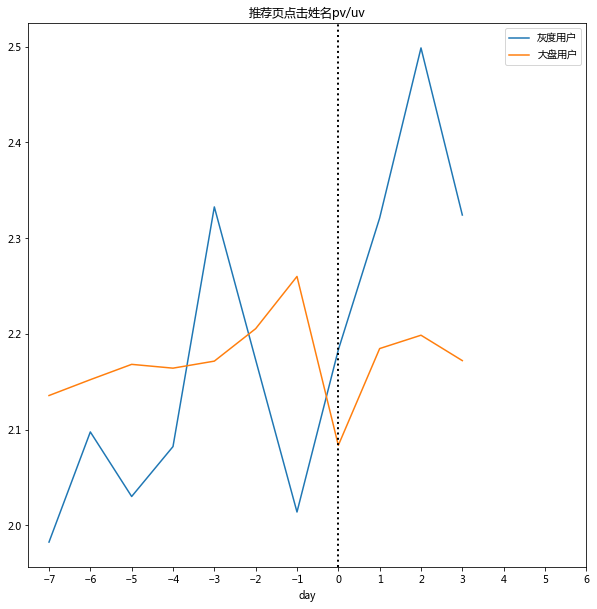

In [22]:
# 人均指标
output_single_active_level = 'single_active_grey_old.csv'

def get_key_index_active_level(file,index, index_pv, index_uv):
        df_ori_a = pd.read_csv(file)
        selected_columns_a = df_ori_a.columns.drop('update_date').drop('dlu_date')
        aggregated_columns_a = selected_columns_a.drop('day')
        table_a = pd.pivot_table(df_ori_a[selected_columns_a], values=aggregated_columns_a, index=['day'], aggfunc=np.sum)

        df_key_index_a = pd.DataFrame(index=table_a.index)
        for column_name, column_name_uv in zip([index_pv],[index_uv]):
            df = table_a[column_name] / table_a[column_name_uv]
            df_key_index_a = pd.concat([df_key_index_a, df], axis=1)
        df_key_index_a.columns = [index]
        return df_key_index_a
    
for index, index_pv, index_uv in zip(index, index_pv,index_uv):
    index_single_grey_active_level = get_key_index_active_level(file_grey, index, index_pv, index_uv)
    index_single_old_active_level = get_key_index_active_level(file_old, index, index_pv, index_uv)
    single_days_active_level = pd.concat([index_single_grey_active_level, index_single_old_active_level], axis=1)
    single_days_active_level.columns = ['灰度用户','大盘用户']
    single_days_active_level.to_csv(output_single_active_level, encoding='utf_8_sig')
    single_days_active_level.plot(figsize=(10,10),title=index)
    plt.legend(loc='upper right')
    my_x_ticks = np.arange(-7, 7, 1)
    plt.xticks(my_x_ticks)
    l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
    relative_difference_active_level

# 4·新用户0_vv占比

In [154]:
vv_file = '0vv.csv'
output_vv_file = '0vv_rate.csv'
df_ori = pd.read_csv(vv_file)

def vv_rate(file):
        df_ori_a = pd.read_csv(file)
        value_lst = ['user_count','0_vv_user']
        index_lst = ['up_date','channel','app_version']
        index = ['0vv占比']
        selected_columns_a = df_ori_a.columns.drop('dlu_date')

        table_a = pd.pivot_table(df_ori_a[selected_columns_a], values=value_lst, index=index_lst,columns=['day'], aggfunc=np.sum)
        df_key_index_a = pd.DataFrame(index=table_a.index)
        df = table_a['0_vv_user'] / table_a['user_count']
        return df
vv_level = vv_rate(vv_file).T.loc[[0]]
vv_level.T.to_csv(output_vv_file, encoding='utf_8_sig')
vv_level

up_date             2018-08-23                                      \
channel     dy-gray-qk-control           dy-gray-qk-test             
app_version              2.4.0     2.5.0           2.4.0     2.5.0   
day                                                                  
0                          1.0  0.152574        0.933333  0.176682   

up_date             2018-08-24                                             \
channel     dy-gray-qk-control           dy-gray-qk-test                    
app_version              2.4.0     2.5.0           2.4.0     2.5.0  2.5.1   
day                                                                         
0                      0.97619  0.167192             1.0  0.151444  0.125   

up_date             2018-08-25    ...            2018-08-27            \
channel     dy-gray-qk-control    ...    dy-gray-qk-control             
app_version              2.4.0    ...                 2.4.0     2.5.0   
day                               ...                                   
0                     0.967742    ...                   1.0  0.182306   

up_date                                                 2018-08-28            \
channel     dy-gray-qk-test                     dy-gray-qk-control             
app_version           2.4.0     2.5.0     2.5.1              2.4.0     2.5.0   
day                                                                            
0                  0.952381  0.434783  0.159861                1.0  0.178264   

up_date                                          
channel     dy-gray-qk-test                      
app_version           2.4.0     2.5.0     2.5.1  
day                                              
0                  0.888889  0.462963  0.165408  

[1 rows x 29 columns]

# 5·push覆盖率/到达率/点击率

In [ ]:
push_file = 'push.csv'
output_push_file = 'push_red_rate.csv'
df_ori = pd.read_csv(push_file)

def push_rate(file):
        df_ori_a = pd.read_csv(file)
        value_lst = ['user_count','sent_uv','show_uv','click_uv','red_uv']
        index_lst = ['up_date','channel','app_version','day']
        index = ['push覆盖率','push展现率','push点击率','red覆盖率']
        selected_columns_a = df_ori_a.columns.drop('dlu_date')
        table_a = pd.pivot_table(df_ori_a[selected_columns_a], values=value_lst, index=index_lst, aggfunc=np.sum)
    
        df_key_index_a = pd.DataFrame(index=table_a.index)
        a = ['sent_uv','show_uv','click_uv','red_uv']
        b = ['user_count','sent_uv','show_uv','user_count']
        for column_name, column_name_uv in zip(a,b):
            df = table_a[column_name] / table_a[column_name_uv]
            df_key_index_a = pd.concat([df_key_index_a, df], axis=1)
        df_key_index_a.columns = [index]
        return df_key_index_a
    
push_red_level = push_rate(push_file)
push_red_level.to_csv(output_push_file, encoding='utf_8_sig')
# for x in push_red_level['day'][:-1]:
#     if x  == 1:
#         print(push_red_level)
push_red_level

# 显著性计算

In [32]:
# 输入样本总量n1,n2 
import numpy as np
n1 = 9316322
n2 = 9303632
value1 = 591808
value2 = 594004
def xianZhuXing(n1, n2, value1,value2):
    p1 = value1/n1
    p2 = value2/n2

    res = (p1-p2)/(np.sqrt(p1*(1-p1)/n1+p2*(1-p2)/n2))
    return res
x = xianZhuXing(n1, n2,value1,value2)
x

-2.8510448788544527

In [19]:
# 显著性计算-典雅写法
d = {'n1':827,'n2':837,'value1':168,'value2':159}
(d['value1']/d['n1']-d['value2']/d['n2'])/(np.sqrt(d['value1']/d['n1']*(1-d['value1']/d['n1'])/d['n1']+d['value2']/d['n2']*(1-d['value2']/d['n2'])/d['n2']))

0.6764767663345603